In [ ]:
try:
    import open_clip
    from optim_utils import * 
except ModuleNotFoundError:
    # You only really need this safety net if you want to run these notebooks directly in the examples directory
    # Don't worry about this if you installed the package or moved the notebook to the main directory.
    import os; os.chdir("..")
    import open_clip
    from optim_utils import * 

import torch
import mediapy as media
import argparse
import copy

## Load Arguments

In [2]:
args = argparse.Namespace()
args.__dict__.update(read_json("sample_config.json"))

args.prompt_len = 8
args

Namespace(prompt_len=8, iter=3000, lr=0.1, weight_decay=0.1, prompt_bs=1, loss_weight=1.0, print_step=100, batch_size=1, clip_model='ViT-H-14', clip_pretrain='laion2b_s32b_b79k')

## Load Clip Model

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, preprocess = open_clip.create_model_and_transforms(args.clip_model, pretrained=args.clip_pretrain, device=device)

tokenizer = open_clip.tokenizer._tokenizer
original_token_embedding = copy.deepcopy(model.token_embedding)

## Load Target Image

""

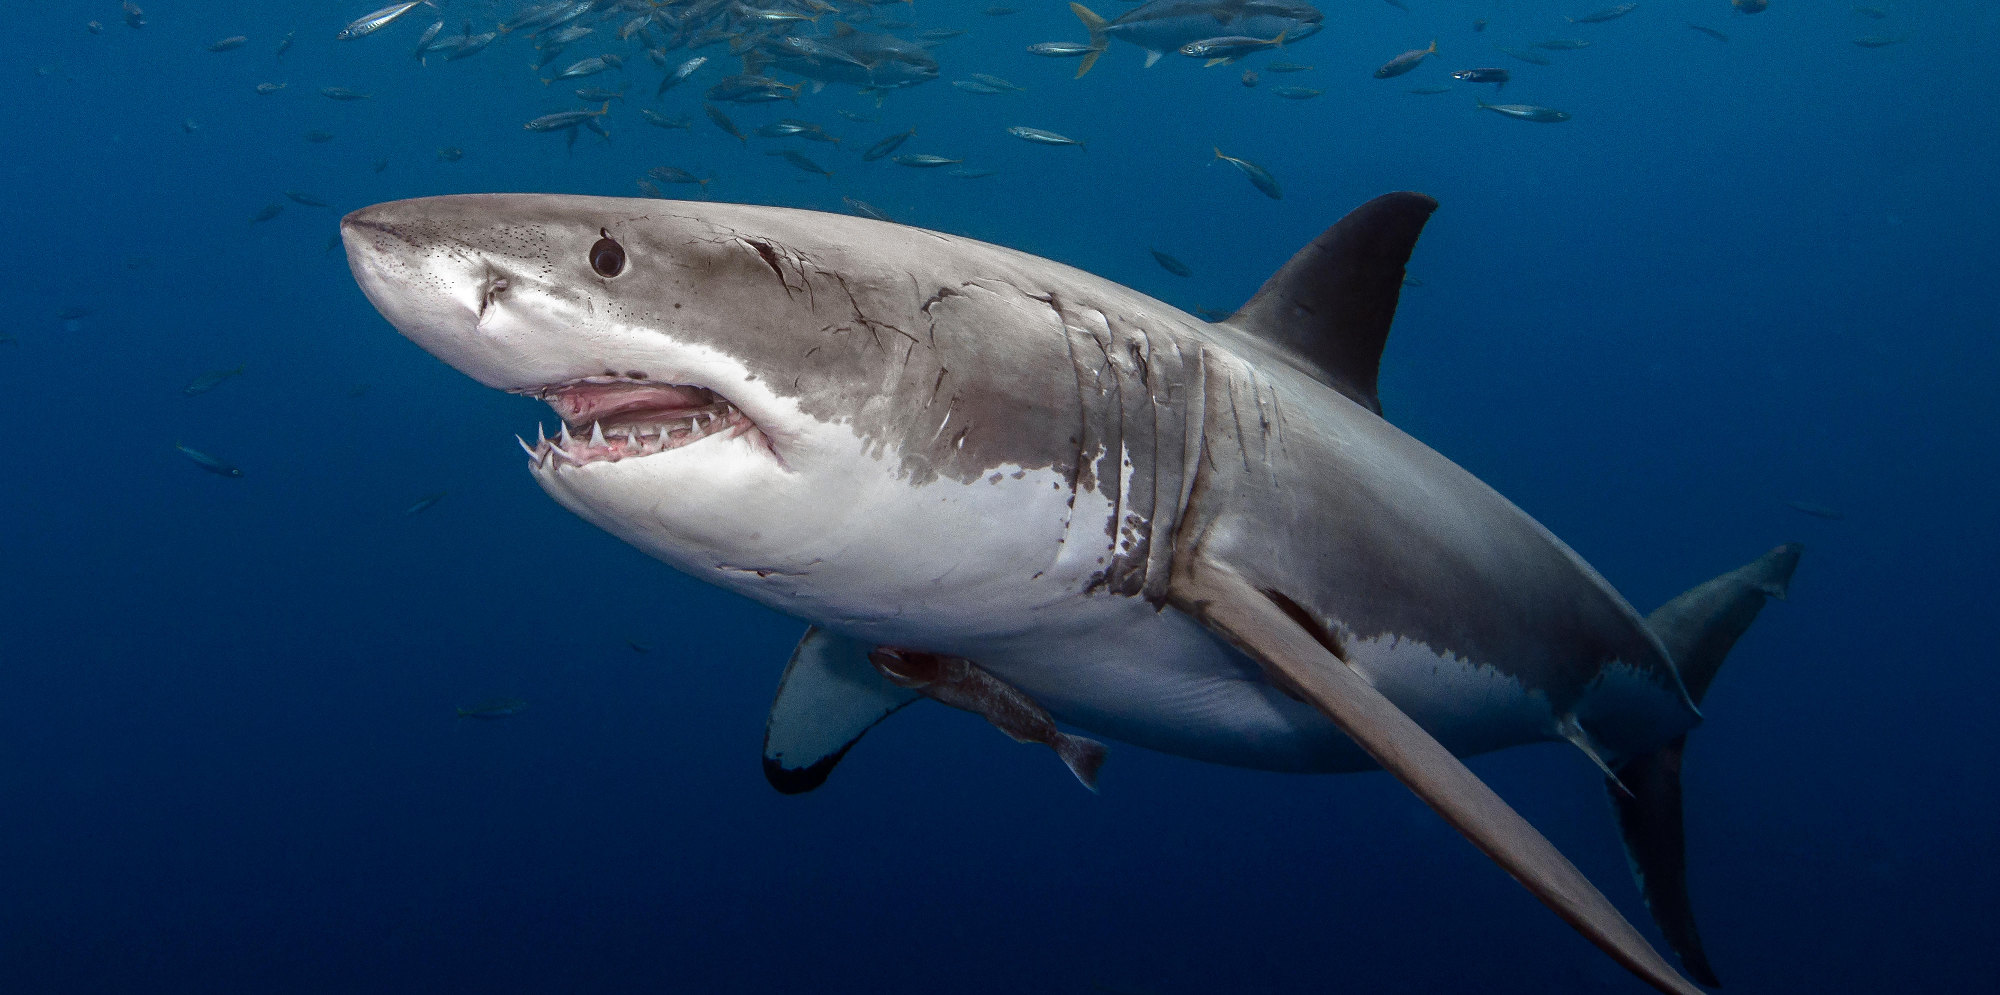

In [4]:
urls = [
        "https://www.nps.gov/caco/planyourvisit/images/WEF_7206181_2.jpg",
       ]

orig_images = list(filter(None,[download_image(url) for url in urls]))
media.show_images(orig_images)

## Blocklist

In [5]:
### substrings you want to block
blocklist_substrings = ["shark", "jaw", "🦈"]

blocklist = []
blocklist_words = []

for curr_w in blocklist_substrings:
    blocklist += tokenizer.encode(curr_w)
    blocklist_words.append(curr_w)

for curr_w in list(tokenizer.encoder.keys()):
    for blocklist_substring in blocklist_substrings:
        if blocklist_substring in curr_w:
            blocklist.append(tokenizer.encoder[curr_w])
            blocklist_words.append(curr_w)
blocklist = list(set(blocklist))

token_embedding = copy.deepcopy(original_token_embedding)
if blocklist is not None:
    with torch.no_grad():
        token_embedding.weight[blocklist] = 0
        
model.token_embedding = token_embedding

print("blocked words")
print(blocklist_words)

blocked words
['shark', 'jaw', '🦈', 'shark</w>', 'sharks</w>', 'jaw', 'shark', 'jaw</w>', 'jaws</w>', 'sharkweek</w>', 'jawa']


## Optimize Prompt

In [6]:
learned_prompt = optimize_prompt(model, preprocess, args, device, target_images=orig_images)


step: 0, lr: 0.1, cosim: 0.060, text: tuned sgobotanic kett belgian argonmustard smc

step: 100, lr: 0.1, cosim: 0.226, text: nts guardiola affects tigers dangerous ruger responds seaworld 

step: 200, lr: 0.1, cosim: 0.254, text: predict guardiola convinced tigers merle iansomerhalder considerably seaworld 

step: 300, lr: 0.1, cosim: 0.301, text: discovering iansomerhalder biodiversity feared harbormako scientists earthquakes 

step: 400, lr: 0.1, cosim: 0.238, text: bornonthisday pakvgenetic ultimate scorpions marlin rhinos earthquakes 

step: 500, lr: 0.1, cosim: 0.291, text: bornonthisday deepikapgraphene threatening tyranorcas scientists rematch 

step: 600, lr: 0.1, cosim: 0.289, text: pbs deepikapmozambique ucn guardiola marlin predatconsiderably 

step: 700, lr: 0.1, cosim: 0.296, text: existed deepikapcrispr crispr batb harbortuna cussions 

step: 800, lr: 0.1, cosim: 0.329, text: articles tamannacrispr predatsharapoanimalrights mozambique extinction 

step: 900, lr: 0.1, co